1. Import library and prepare webcam

In [1]:
import cv2 
import numpy as np 
import os
import matplotlib.pyplot as plt 
import time 
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils                  

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False                  
    results = model.process(image)                
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION)
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.7,min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():
        ret,frame = cap.read()
        image,results = mediapipe_detection(frame,holistic)
        print(results)
        draw_styled_landmarks(image,results)
        cv2.imshow('My WebCam',image)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
len(results.face_landmarks.landmark)

468

In [9]:
len(results.pose_landmarks.landmark)

33

In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
print(results)

<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [12]:
draw_landmarks(image,results)

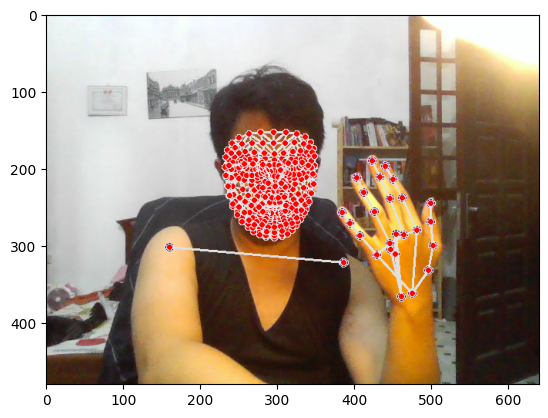

In [13]:
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))

2.Extract Keypoint Value

In [14]:
len(results.left_hand_landmarks.landmark)

21

In [15]:
results.face_landmarks

landmark {
  x: 0.46476993
  y: 0.526763797
  z: -0.0174921956
}
landmark {
  x: 0.46594435
  y: 0.49304387
  z: -0.0413431078
}
landmark {
  x: 0.464583308
  y: 0.501430273
  z: -0.0193881821
}
landmark {
  x: 0.457664043
  y: 0.452636
  z: -0.0351425931
}
landmark {
  x: 0.465987921
  y: 0.481548548
  z: -0.0450351052
}
landmark {
  x: 0.465437859
  y: 0.465108097
  z: -0.0433684029
}
landmark {
  x: 0.46333918
  y: 0.423560888
  z: -0.0264293123
}
landmark {
  x: 0.403111368
  y: 0.416688353
  z: -0.000122067591
}
landmark {
  x: 0.462617218
  y: 0.394429505
  z: -0.0244761072
}
landmark {
  x: 0.462629795
  y: 0.378776133
  z: -0.0280992649
}
landmark {
  x: 0.461616158
  y: 0.319133341
  z: -0.0261994544
}
landmark {
  x: 0.464690208
  y: 0.532190204
  z: -0.0158714633
}
landmark {
  x: 0.464450121
  y: 0.535867333
  z: -0.0127059901
}
landmark {
  x: 0.464134932
  y: 0.53685534
  z: -0.00876280107
}
landmark {
  x: 0.464295328
  y: 0.539663374
  z: -0.00664147036
}
landmark {
  x

In [16]:
results.left_hand_landmarks

landmark {
  x: 0.743475854
  y: 0.755158782
  z: 2.36557611e-007
}
landmark {
  x: 0.775757372
  y: 0.693201125
  z: -5.58963729e-005
}
landmark {
  x: 0.785145581
  y: 0.625314951
  z: -0.00658949092
}
landmark {
  x: 0.779734492
  y: 0.561692774
  z: -0.0132431723
}
landmark {
  x: 0.780699193
  y: 0.511727035
  z: -0.0214497931
}
landmark {
  x: 0.752518296
  y: 0.585371733
  z: -0.026471056
}
landmark {
  x: 0.723340511
  y: 0.496258289
  z: -0.0393580534
}
landmark {
  x: 0.704210162
  y: 0.44786787
  z: -0.0436899811
}
landmark {
  x: 0.688590884
  y: 0.411051929
  z: -0.0458683223
}
landmark {
  x: 0.725479722
  y: 0.596929133
  z: -0.0343407281
}
landmark {
  x: 0.697844744
  y: 0.498353541
  z: -0.047827404
}
landmark {
  x: 0.677931964
  y: 0.439809769
  z: -0.0542600416
}
landmark {
  x: 0.662484288
  y: 0.397598803
  z: -0.0583505556
}
landmark {
  x: 0.698098779
  y: 0.620172858
  z: -0.0403991155
}
landmark {
  x: 0.665902078
  y: 0.534594953
  z: -0.0518155
}
landmark {

In [17]:
results.pose_landmarks

landmark {
  x: 0.464454174
  y: 0.465063184
  z: -0.640000463
  visibility: 0.999990404
}
landmark {
  x: 0.490667671
  y: 0.404079646
  z: -0.586255431
  visibility: 0.999981
}
landmark {
  x: 0.505498111
  y: 0.401531845
  z: -0.586033762
  visibility: 0.999986708
}
landmark {
  x: 0.519101083
  y: 0.400099218
  z: -0.585427403
  visibility: 0.999981463
}
landmark {
  x: 0.440000623
  y: 0.406680435
  z: -0.618145585
  visibility: 0.99997592
}
landmark {
  x: 0.419434935
  y: 0.405910641
  z: -0.617583156
  visibility: 0.999978781
}
landmark {
  x: 0.402579457
  y: 0.405682
  z: -0.617749155
  visibility: 0.999964654
}
landmark {
  x: 0.532691836
  y: 0.408652
  z: -0.22849372
  visibility: 0.999985218
}
landmark {
  x: 0.371809453
  y: 0.410163134
  z: -0.363250643
  visibility: 0.999992132
}
landmark {
  x: 0.486251205
  y: 0.518261731
  z: -0.497991145
  visibility: 0.999985635
}
landmark {
  x: 0.432075351
  y: 0.522420824
  z: -0.538120806
  visibility: 0.99999088
}
landmark {


In [18]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [19]:
def extract_keypoints(results):
    pose = np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face = np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3) 
    left_hand = np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hand = np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, left_hand, right_hand]) 

In [20]:
result_test = extract_keypoints(results)

In [21]:
result_test

array([ 0.46445417,  0.46506318, -0.64000046, ...,  0.        ,
        0.        ,  0.        ])

In [22]:
len(result_test)

1662

In [24]:
np.save('0',result_test)

In [59]:
np.load('0.npy')

array([ 0.51617628,  0.41920656, -1.27618527, ...,  0.        ,
        0.        ,  0.        ])

3. Set up folders for collection

In [82]:
DATA_PATH = os.path.join('MP_Data')
actions = np.array(['hello','thanks','iloveyou','i','you','yesterday','yes','no','help','goodbye'])
no_sequences = 30
sequence_length = 30

In [83]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass 

4. Collect keypoint values for training and testing


In [84]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)
                print(results)
#           

                draw_styled_landmarks(image, results)
                
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

5. Preprocess data and create labels and features

In [85]:
from sklearn.model_selection import train_test_split 
import torch 

In [86]:
label_map = {label:num for num,label in enumerate(actions)}

In [87]:
label_map

{'hello': 0,
 'thanks': 1,
 'iloveyou': 2,
 'i': 3,
 'you': 4,
 'yesterday': 5,
 'yes': 6,
 'no': 7,
 'help': 8,
 'goodbye': 9}

In [88]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH,action,str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])


In [89]:
np.array(sequences).shape 

(300, 30, 1662)

In [90]:
np.array(labels).shape

(300,)

In [95]:
X = np.array(sequences)
X.shape 

(300, 30, 1662)

In [96]:
len(actions)

10

In [97]:
import torch.nn.functional as F 

In [155]:
y = F.one_hot(torch.tensor(labels)).numpy()

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 42)

In [157]:
X_train.shape

(210, 30, 1662)

In [159]:
X_train[0]

array([[ 0.53416711,  0.30082461, -0.62115633, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53694063,  0.3006815 , -0.67721725, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.5401839 ,  0.30053478, -0.66288126, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.54508758,  0.31021219, -0.67496043, ...,  0.2466061 ,
         0.64638674, -0.07711217],
       [ 0.5445081 ,  0.3101947 , -0.62712753, ...,  0.24667232,
         0.6476059 , -0.07936507],
       [ 0.54436135,  0.30947244, -0.6327436 , ...,  0.25073129,
         0.64347762, -0.07674617]])

In [177]:
y_train[0].shape

(10,)

In [160]:
y_test.shape

(90, 10)

In [161]:
y_test[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [162]:
print(type(X_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [163]:
from torch.utils.data import DataLoader,TensorDataset
train_loader = DataLoader(TensorDataset(torch.from_numpy(X_train),torch.from_numpy(y_train)),batch_size=4,shuffle=True)
test_loader = DataLoader(TensorDataset(torch.from_numpy(X_test),torch.from_numpy(y_test)),batch_size = 4,shuffle = False)

In [183]:
print(len(train_loader.dataset))
print(len(test_loader))

210
23


6. Build and train model

In [165]:
import torch.nn as nn 
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter

In [166]:
log_dir = os.path.join('Logs')
writter = SummaryWriter(log_dir)
print(writter)

In [185]:
from torchvision.models import resnet18

In [194]:
class LSTMModel(nn.Module):
    def __init__(self,input_size,hidden_size_1,hidden_size_2,hidden_size_3,output_size):
        super(LSTMModel,self).__init__()
        self.lstm1 = nn.LSTM(input_size,hidden_size_1,num_layers=1,batch_first = True)
        self.relu1 = nn.ReLU()
        self.lstm2 = nn.LSTM(hidden_size_1,hidden_size_2,num_layers=2,batch_first = True)
        self.relu2 = nn.ReLU()
        self.lstm3 = nn.LSTM(hidden_size_2,hidden_size_3,num_layers=3,batch_first = True)
        self.relu3 = nn.ReLU()
        self.fc1 = nn.Linear(hidden_size_3,64)
        self.dropout1 = nn.Dropout(0.3)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(64,32)
        self.dropout2 = nn.Dropout(0.3)
        self.relu5 = nn.ReLU()
        self.fc3 = nn.Linear(32,output_size)
    
    def forward(self,x):
        x, _ = self.lstm1(x)
        x = self.relu1(x)
        x, _ = self.lstm2(x)
        x = self.relu2(x)
        x, _ = self.lstm3(x)
        x = self.relu3(x)
        x = self.fc1(x)
        x = self.dropout1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        x = self.dropout2(x)
        x = self.relu5(x)
        x = self.fc3(x)
        return x 





In [196]:
input_size = 1662
hidden_size_1 = 64
hidden_size_2 = 128
hidden_size_3 = 64
output_size = len(actions)
model = LSTMModel(input_size,hidden_size_1,hidden_size_2,hidden_size_3,output_size)

In [197]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [198]:
model = model.to(device)

In [199]:
print(model)

LSTMModel(
  (lstm1): LSTM(1662, 64, batch_first=True)
  (relu1): ReLU()
  (lstm2): LSTM(64, 128, num_layers=2, batch_first=True)
  (relu2): ReLU()
  (lstm3): LSTM(128, 64, num_layers=3, batch_first=True)
  (relu3): ReLU()
  (fc1): Linear(in_features=64, out_features=64, bias=True)
  (dropout1): Dropout(p=0.3, inplace=False)
  (relu4): ReLU()
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (relu5): ReLU()
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


In [200]:
optimizer = optim.Adam(model.parameters(),lr=0.001)
loss_function = nn.CrossEntropyLoss()

In [117]:
res = [.1,.2,.3]
print(actions[np.argmax(res)])

iloveyou


In [135]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [202]:
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    for x, y in train_loader:
        x = x.float().to(device)
        y = y.long().to(device)
        y = torch.argmax(y,dim = 1)
        output = model(x)[:,-1,:]
        loss = loss_function(output,y)
       
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    model.eval()
    running_loss = 0.0
    total = 0
    correct = 0 
    with torch.no_grad():
        for x,y in test_loader:
            x = x.float().to(device)
            y = y.long().to(device)
            y = torch.argmax(y,dim = 1)
            output = model(x)[:,-1,:]
            loss = loss_function(output,y)
            running_loss += loss.item()
            _, predicted = torch.max(output.data,1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
    accuracy = (100*correct) / total
    avg_loss = running_loss / len(test_loader)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%')

Epoch 1/100, Loss: 2.3058, Accuracy: 13.33%
Epoch 2/100, Loss: 2.3119, Accuracy: 4.44%
Epoch 3/100, Loss: 2.3241, Accuracy: 4.44%
Epoch 4/100, Loss: 2.3254, Accuracy: 4.44%
Epoch 5/100, Loss: 2.3342, Accuracy: 4.44%
Epoch 6/100, Loss: 2.3589, Accuracy: 4.44%
Epoch 7/100, Loss: 2.3391, Accuracy: 4.44%
Epoch 8/100, Loss: 2.3400, Accuracy: 4.44%
Epoch 9/100, Loss: 2.3402, Accuracy: 4.44%
Epoch 10/100, Loss: 2.3492, Accuracy: 4.44%
Epoch 11/100, Loss: 2.3434, Accuracy: 4.44%
Epoch 12/100, Loss: 2.3425, Accuracy: 4.44%
Epoch 13/100, Loss: 2.3468, Accuracy: 4.44%
Epoch 14/100, Loss: 2.3492, Accuracy: 4.44%
Epoch 15/100, Loss: 2.3580, Accuracy: 4.44%
Epoch 16/100, Loss: 2.3503, Accuracy: 4.44%
Epoch 17/100, Loss: 2.3524, Accuracy: 4.44%
Epoch 18/100, Loss: 2.3491, Accuracy: 4.44%
Epoch 19/100, Loss: 2.3474, Accuracy: 4.44%
Epoch 20/100, Loss: 2.3486, Accuracy: 4.44%
Epoch 21/100, Loss: 2.3566, Accuracy: 4.44%
Epoch 22/100, Loss: 2.3658, Accuracy: 4.44%
Epoch 23/100, Loss: 2.3689, Accuracy: 4.